<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Anova_Link_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics as stat
import scipy.stats as stats

In [6]:
#one way anova is categorical to numeric relationships
df = pd.read_csv("http://ishelp.info/data/bikebuyers.csv")

In [7]:
from scipy.stats import f

#anova the heck outta this
#first the f statistic

# number of predictors
k = 2
n = len(df)

# degrees of freedom
dfn = k
dfd = n - k - 1

# F critical at 95% confidence
f_critical = f.ppf(0.95, dfn, dfd)
print("F-critical:", f_critical)
df.columns

F-critical: 3.004751748095738


Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

In [8]:
from scipy.stats import f_oneway

#one way anova
f, p = f_oneway(df['Income'], df['EducationNumeric'])
f

np.float64(3262.0183077262877)

In [9]:
df['Education'].unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [10]:
df['EducationNumeric'] = df['Education']

df.EducationNumeric.replace(
    ['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'],
    [1, 2, 3, 4, 5],
    inplace=True
)

/tmp/ipython-input-2500618915.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.EducationNumeric.replace(
/tmp/ipython-input-2500618915.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.EducationNumeric.replace(


In [11]:
df['Commute_rank'] = df['Commute Distance'].replace(
    ['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'],
    [0, 1, 2, 5, 10]
)

/tmp/ipython-input-2173514330.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Commute_rank'] = df['Commute Distance'].replace(


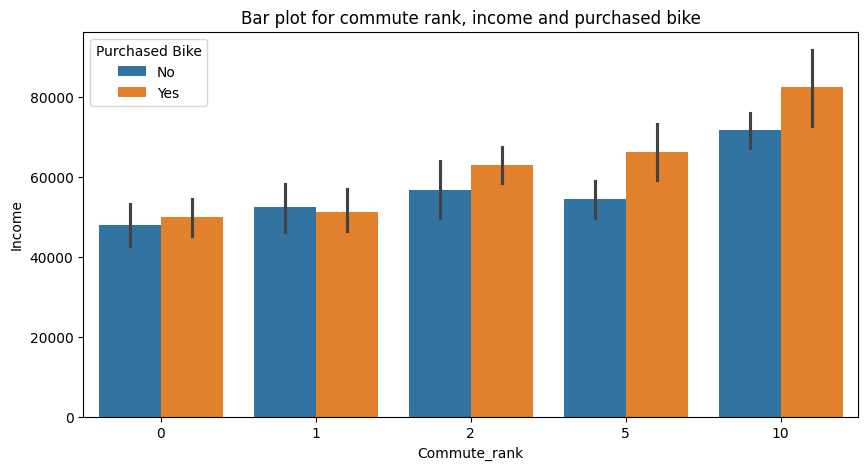

In [32]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for commute rank, income and purchased bike")
sns.barplot(
    data=df,
    x='Commute_rank',
    y='Income',
    hue='Purchased Bike',
);


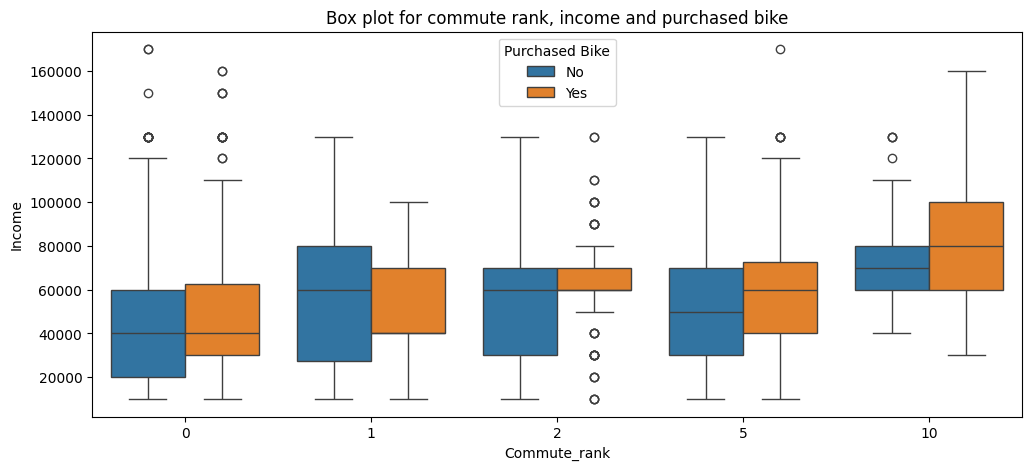

In [26]:
#box plot
plt.figure(figsize=(12, 5))
plt.title("Box plot for commute rank, income and purchased bike")
sns.boxplot(
    data=df,
    x='Commute_rank',
    y='Income',
    hue='Purchased Bike',
);


Text(0.5, 1.0, 'Bike Purchases by Commute Rank')

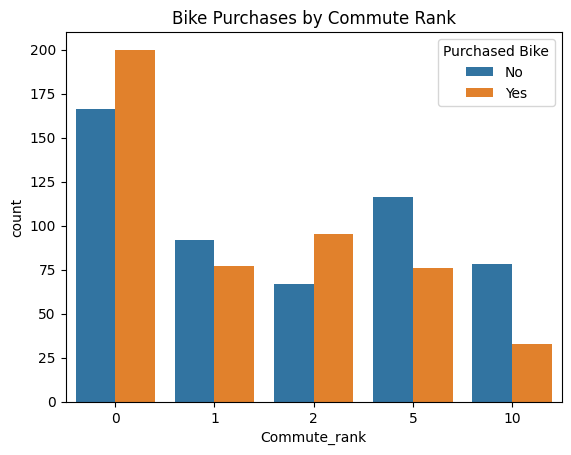

In [33]:
sns.countplot(data=df, x='Commute_rank', hue='Purchased Bike')
plt.title("Bike Purchases by Commute Rank")

/tmp/ipython-input-1436021377.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=45);  # rotate by 45 degrees


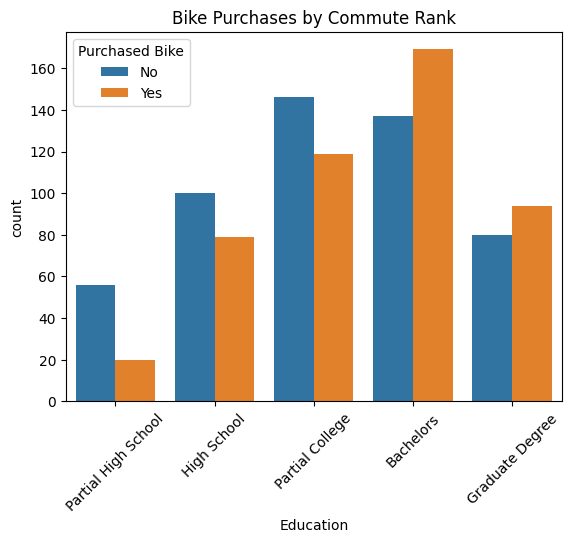

In [42]:
viz = sns.countplot(data=df, x='Education', hue='Purchased Bike', order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=45);  # rotate by 45 degrees
plt.title("Bike Purchases by Commute Rank")
plt.show()

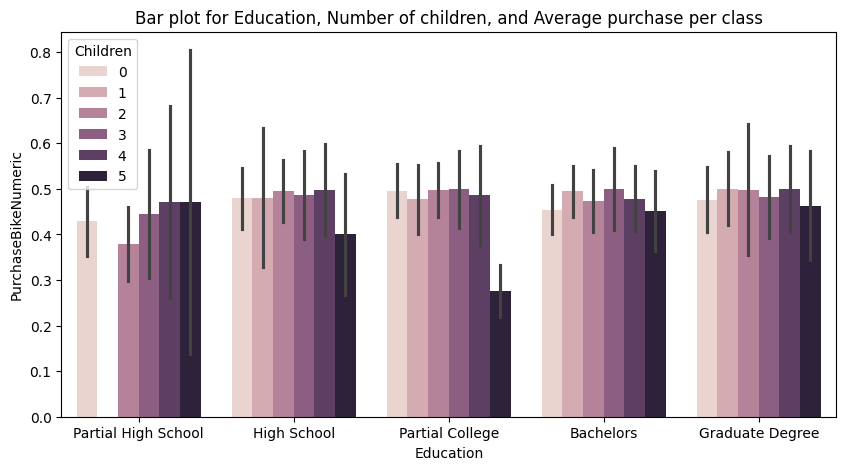

In [58]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for Education, Number of children, and Average purchase per class")
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='Children',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se'
);

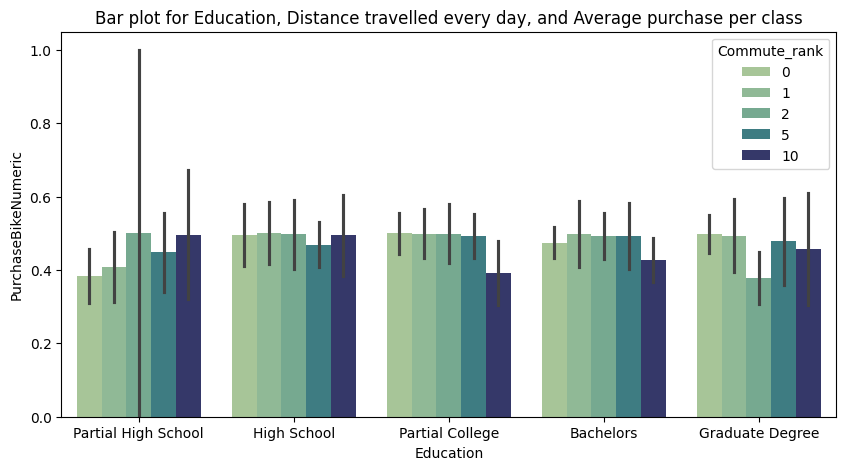

In [71]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for Education, Distance travelled every day, and Average purchase per class")
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='Commute_rank',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
    palette='crest'
);

In [61]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike', 'Commute_rank'],
      dtype='object')

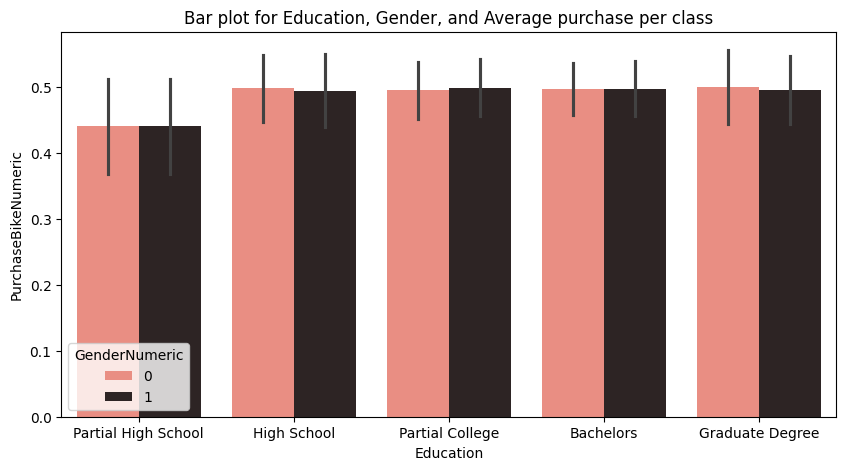

In [77]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for Education, Gender, and Average purchase per class")
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='GenderNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
    palette="dark:salmon_r",
);

#shows no influence of gender on bike purchases

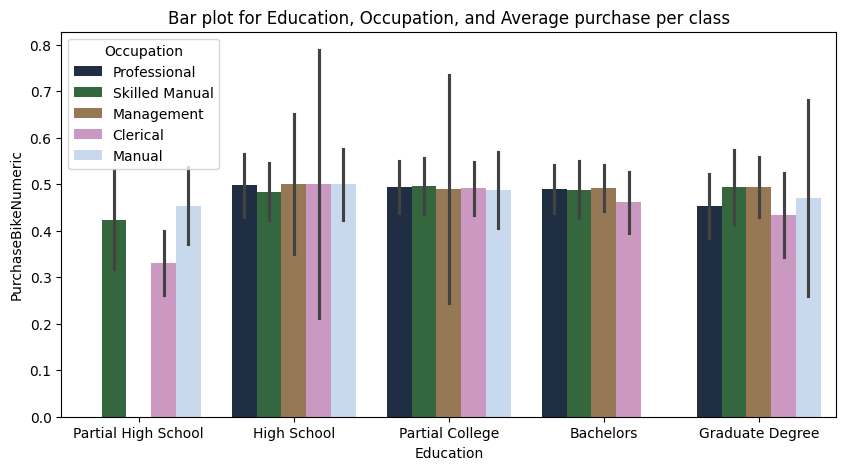

In [72]:
plt.figure(figsize=(10, 5))
plt.title("Bar plot for Education, Occupation, and Average purchase per class")
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='Occupation',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
    palette='cubehelix'
);

#shows no influence of gender on bike purchases

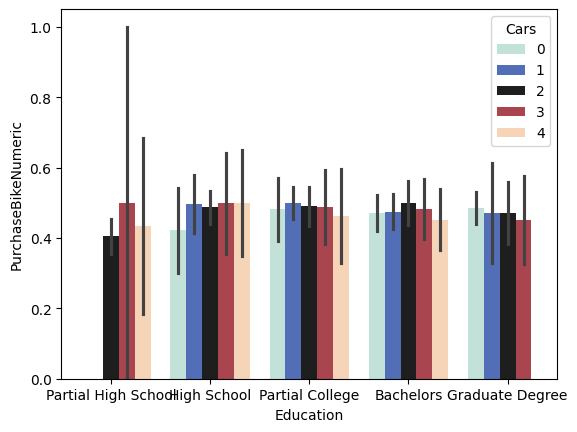

In [83]:
sns.barplot(
    data=df,
    x='Education',
    y='PurchaseBikeNumeric',
    hue='Cars',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
    palette='icefire'
);

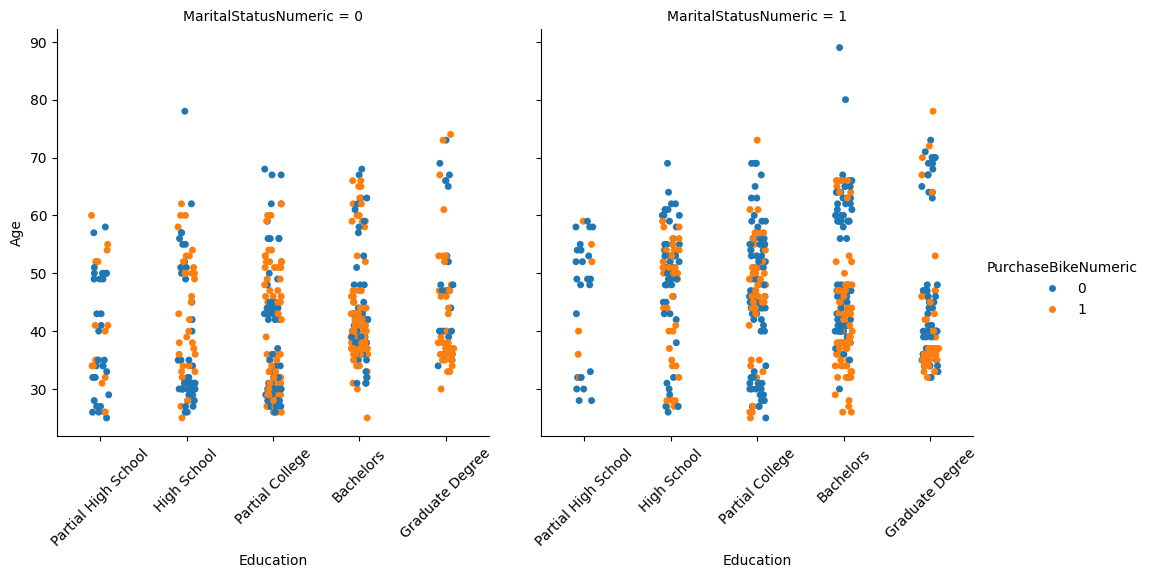

In [89]:
viz = sns.catplot(
    data=df,
    x='Education',
    y='Age',
    col='MaritalStatusNumeric',
    hue='PurchaseBikeNumeric',
    order=['Partial High School', 'High School', 'Partial College','Bachelors', 'Graduate Degree'],
    estimator = np.std, #to see the spread of the data
    errorbar= 'se',
);
viz.set_xticklabels(rotation=45)

#cat plot to see how the age and gender and other numeric features interact